In [ ]:
# Download the Main_Independent_Dataset_COLAB.csv by running this code (PLEASE WAIT until the file has been downloaded)

from google.colab import files
! gdown --id 1RwOawpfOCZw7OCblYg7Y4pXOHsKyFDBW
files.download('/content/Main_Indepedent_Dataset_COLAB.csv')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QIksjaGTltAMkCM9f3_mXJ-B8tVBDuex
To: /content/Main_Indepedent_Dataset_COLAB.csv
100% 598k/598k [00:00<00:00, 93.2MB/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Then, create your new samples of silica nanoparticles in Main_Independent_Dataset_COLAB.csv with Publication_id = 150
# PLEASE UPLOAD the new file (Main_Independent_Dataset_COLAB.csv) containing your new samples of silica nanoparticles by running this code

!rm Main_Indepedent_Dataset_COLAB.csv
!pip install catboost==1.0.4
import pandas as pd
import catboost
import io
from catboost import CatBoostClassifier
print('The CatBoost version is {}.'.format(catboost.__version__))
uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The CatBoost version is 1.0.4.


Saving Main_Indepedent_Dataset_COLAB.csv to Main_Indepedent_Dataset_COLAB.csv


In [ ]:
# Predict your new samples of silica nanoparticles by running this code, and PLEASE WAIT until the results have been downloaded 

your_new_samples_id = 150
independent_id = 116
data = pd.read_csv(io.BytesIO(uploaded['Main_Indepedent_Dataset_COLAB.csv']), encoding='unicode_escape').iloc[:,:15]

def convert(Cell_viability):
    if Cell_viability == 'Cytotoxic':
        return 1
    if Cell_viability == 'Non_cytotoxic':
        return 0    
    else:
        return ''
    
def convert_back(Cell_viability):
    if Cell_viability == 1:
        return 'Cytotoxic'
    if Cell_viability == 0:
        return 'Non_cytotoxic'
    else:
      return ''
    
data['convert'] = data['Cell_viability'].apply(convert)
data = data.drop('Cell_viability', axis=1)
data = data.rename(columns={'convert':'Cell_viability'}) 

shuffled_main_dataset = data[data['Publication_id'] < independent_id].sample(frac=1, random_state=2022)
independent_dataset = data[data['Publication_id'] >= independent_id]
data = pd.concat([shuffled_main_dataset, independent_dataset])

X = pd.get_dummies(data.drop('Cell_viability', axis=1))
X = X.drop([
    'SiO$_{2}$NP_medium_serum_15%_FBS',
    'Cell_morphology_microglia',

    'Cell_organ_heart',

    'Cell_id_MPMC/3t3',

    'Surface_modification_CHO',
    'Hydrodynamic_size_water_nm_not_determined',
    'Cell_source_hamster',
    'Assay_viability_Sytox_Red',

    'Viability_indicator_live_cell',
], axis=1)

y = data[['Cell_viability', 'Publication_id']]
y = y[y['Publication_id'] < independent_id]
y = y.drop('Publication_id',axis=1)
y = y.to_numpy().ravel()

y_test = data[['Cell_viability','Publication_id']]
y_test = y_test[y_test['Publication_id'] >= independent_id]
y_test =  y_test.drop('Publication_id',axis=1)
y_test = y_test.values

X_test = X[X['Publication_id'] >= independent_id]
X_test = X_test.drop('Publication_id',axis=1)
X_test = X_test.sort_index(ascending=True)
X_test_shap = X_test
X_test = X_test.values.reshape(-1,len(X_test.columns))

X = X[X['Publication_id'] < independent_id]
X = X.drop('Publication_id',axis=1)

models = {"CatBoost Classifier": CatBoostClassifier(learning_rate= 0.05,max_depth= 7,random_state=2022)}

for name, model in models.items():
    model.fit(X.values,y)
    preds = model.predict(X_test)
    
    df_preds = pd.DataFrame(preds)
    df_preds['predicted'] = df_preds[0]
    ytestt = pd.DataFrame(y_test)
    ytestt['observed'] = ytestt[0]
    result = pd.concat([ytestt, df_preds], axis=1)
    result = result.drop([0,0], axis=1)
    independent_data = data[data['Publication_id'] >= independent_id].sort_index(ascending=True).reset_index()
    independent_data = pd.DataFrame(independent_data)
    result = pd.concat([result, independent_data], axis=1).drop(['Cell_viability'], axis=1)
    result['observed'] = result['observed'].apply(convert_back)
    result['predicted'] = result['predicted'].apply(convert_back)
    result[result['Publication_id'] >= your_new_samples_id].to_csv('CatBoost_your_result.csv')
    files.download('CatBoost_your_result.csv')
    result.to_csv('CatBoost_result.csv')
    files.download('CatBoost_result.csv')

0:	learn: 0.6683680	total: 49.5ms	remaining: 49.4s
1:	learn: 0.6468449	total: 53ms	remaining: 26.5s
2:	learn: 0.6276383	total: 56.2ms	remaining: 18.7s
3:	learn: 0.6106987	total: 59.3ms	remaining: 14.8s
4:	learn: 0.5938284	total: 62.5ms	remaining: 12.4s
5:	learn: 0.5803064	total: 65.5ms	remaining: 10.9s
6:	learn: 0.5665724	total: 68.7ms	remaining: 9.74s
7:	learn: 0.5580067	total: 71.9ms	remaining: 8.92s
8:	learn: 0.5431828	total: 75.1ms	remaining: 8.27s
9:	learn: 0.5312278	total: 78.4ms	remaining: 7.76s
10:	learn: 0.5218540	total: 81.5ms	remaining: 7.33s
11:	learn: 0.5126707	total: 84.7ms	remaining: 6.97s
12:	learn: 0.5049537	total: 87.8ms	remaining: 6.67s
13:	learn: 0.4967551	total: 91.1ms	remaining: 6.41s
14:	learn: 0.4891345	total: 94.3ms	remaining: 6.19s
15:	learn: 0.4832886	total: 97.5ms	remaining: 5.99s
16:	learn: 0.4761432	total: 101ms	remaining: 5.82s
17:	learn: 0.4706940	total: 104ms	remaining: 5.66s
18:	learn: 0.4647982	total: 107ms	remaining: 5.52s
19:	learn: 0.4608635	total:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


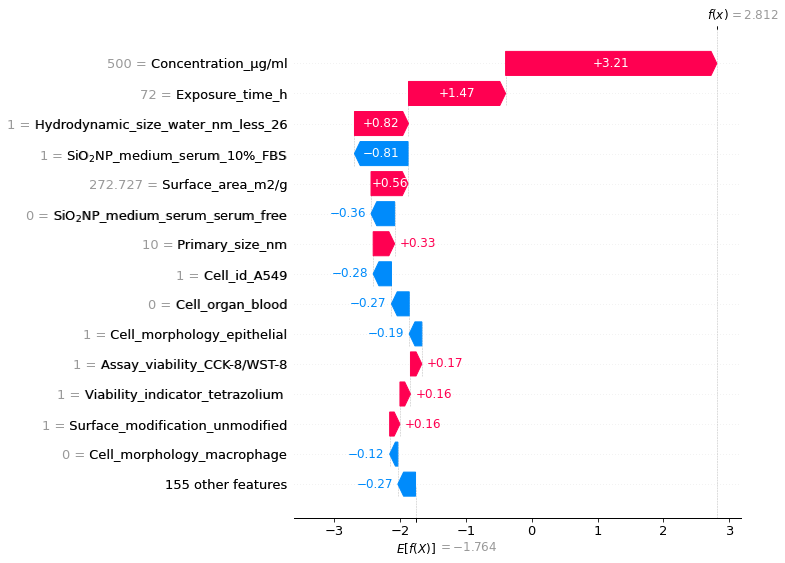

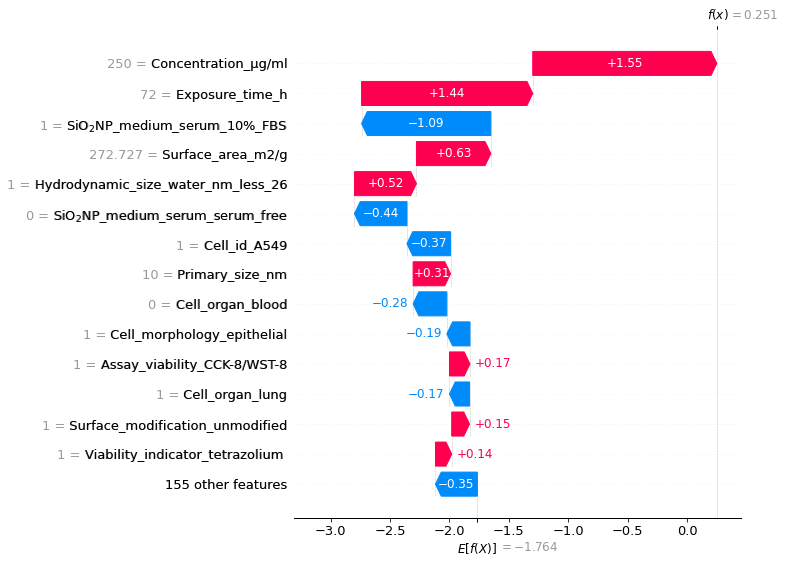

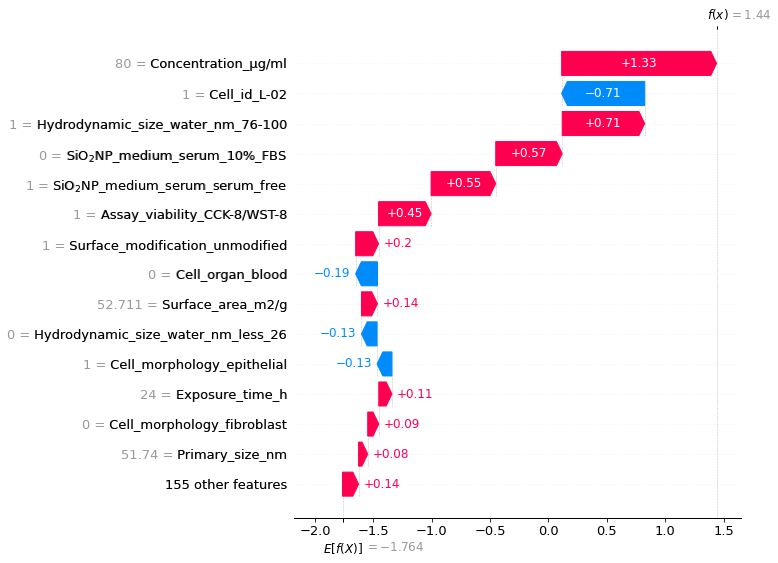

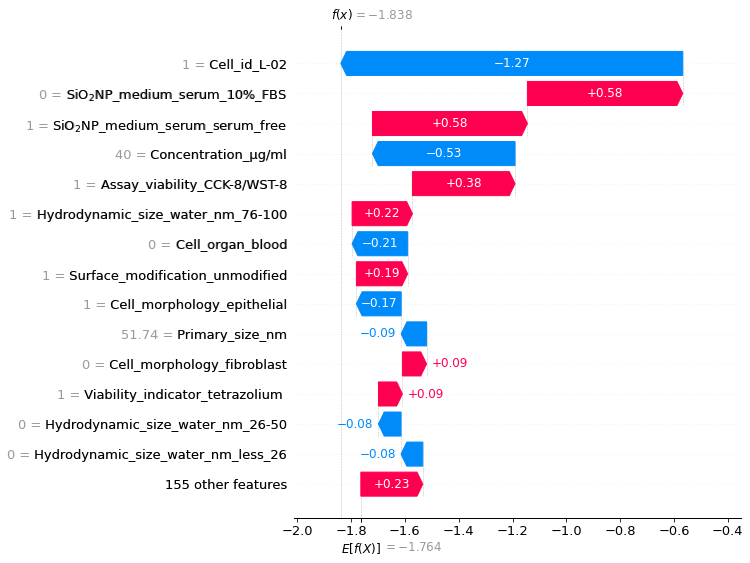

In [ ]:
# Figure 4D, 4F, 4E, and 4G results

!pip install shap
import shap
explainer = shap.Explainer(model)
explainer.expected_value = explainer.expected_value[0]
shap_values = explainer(X_test_shap)

for i in [56,55,877,876]:
    shap.plots.waterfall(shap_values[i], max_display=15)

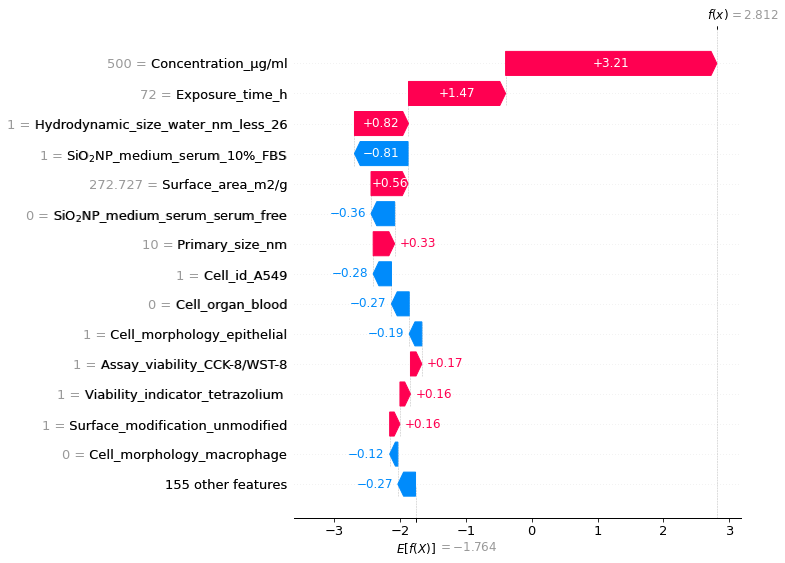

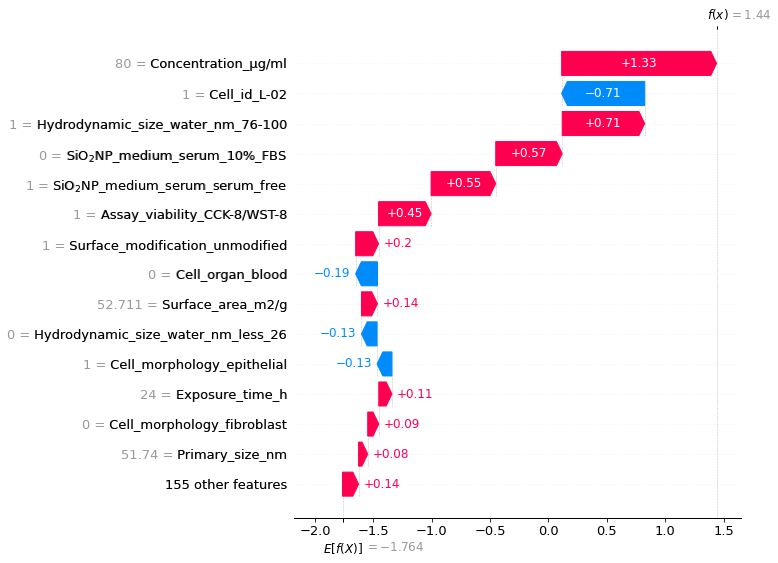

In [ ]:
# Rational Decision-Making of YOUR NEW SAMPLES with Publication_id = 150

for i in range(905,len(X_test_shap)):
    shap.plots.waterfall(shap_values[i], max_display=15)